In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

# set style to whitegrid
plt.style.use("seaborn-whitegrid")

In [11]:
pd.read_csv?

In [20]:
cohorts = pd.read_csv("cohorts.csv", parse_dates=[1,2,3,4], infer_datetime_format=True)

In [22]:
cohorts.head()

,Unnamed: 0,lead,phase2,phase3,closed
0,3,2015-06-19,2015-07-30,2015-08-11,2015-08-11
1,4,2015-06-20,2015-07-20,2015-07-20,2015-07-20
2,5,2015-06-21,NaT,NaT,NaT
3,6,2015-06-22,2015-06-30,2015-07-13,2015-07-13
4,7,2015-06-23,NaT,NaT,NaT


In [21]:
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10283 entries, 0 to 10282
Data columns (total 5 columns):
Unnamed: 0    10283 non-null int64
lead          10283 non-null datetime64[ns]
phase2        5893 non-null datetime64[ns]
phase3        5334 non-null datetime64[ns]
closed        5220 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(1)
memory usage: 401.8 KB


In [25]:
time_to_convert = cohorts["phase2"] - cohorts["lead"]

In [38]:
yearMonth = lambda x : x.strftime("%b-%y")

In [ ]:
cohorts["lead"].get

In [84]:
col_dict = {}
for col in cohorts.columns:
    if isinstance(cohorts.loc[1,col], dt.datetime):
        #print(col)
        col_dict[col] = cohorts.groupby([cohorts[col].dropna().dt.year, cohorts[col].dropna().dt.month])[col].count()
        #print(col_dict[col])

cohorts_ym = pd.DataFrame(col_dict)

In [86]:
cohorts_ym.dropna()

closed  lead  phase2  phase3
2015.0 7.0     49.0   502      91    53.0
       8.0    183.0   602     298   200.0
       9.0    324.0   718     364   338.0
       10.0   396.0   778     460   422.0
       11.0   397.0   736     500   423.0
       12.0   511.0   723     490   503.0
2016.0 1.0    513.0  1109     524   512.0
       2.0    493.0  1030     598   492.0
       3.0    576.0  1112     726   600.0
       4.0    661.0  1089     695   685.0
       5.0    740.0  1122     765   731.0
       6.0    377.0   544     380   375.0

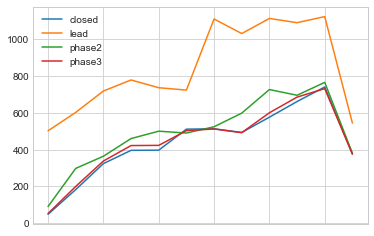

In [87]:
cohorts_ym.dropna().plot()

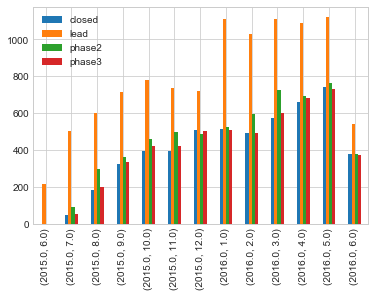

In [92]:

cohorts_ym.plot(kind="bar")

In [129]:
closing_df = pd.DataFrame({"phase2": pd.Series(cohorts["phase2"] - cohorts["lead"]),
               "phase3": pd.Series(cohorts["phase3"] - cohorts["phase2"]),
               "closed" : pd.Series(cohorts["closed"] - cohorts["phase3"])})

closing_df.index = cohorts["lead"]
closing_df.index.name = "opened"

for col in closing_df.columns:
    closing_df[col] = closing_df[col].astype("timedelta64[D]")
    
closing_df = closing_df.loc[:,["phase2", "phase3", "closed"]]

In [140]:
avg_closing_times = closing_df.groupby([closing_df.index.year, closing_df.index.month]).mean()
avg_closing_times.index.names = ["year", "month"]

In [ ]:
avg_closing_times["day"] = avg_clos

In [160]:
datelist = []
for month, year in zip(avg_closing_times.index.get_level_values(1), avg_closing_times.index.get_level_values(0)):
    datelist.append(dt.datetime(year, month, 1))
    
avg_closing_times.index = datelist

In [161]:
avg_closing_times.round(0)

,phase2,phase3,closed
2015-06-01,40.0,11.0,3.0
2015-07-01,39.0,12.0,3.0
2015-08-01,37.0,13.0,4.0
2015-09-01,38.0,13.0,4.0
2015-10-01,36.0,17.0,5.0
2015-11-01,36.0,17.0,5.0
2015-12-01,34.0,16.0,4.0
2016-01-01,34.0,20.0,5.0
2016-02-01,34.0,24.0,5.0
2016-03-01,33.0,22.0,4.0


In [147]:
avg_closing_times.index

MultiIndex(levels=[[2015, 2016], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5]],
           names=['year', 'month'])

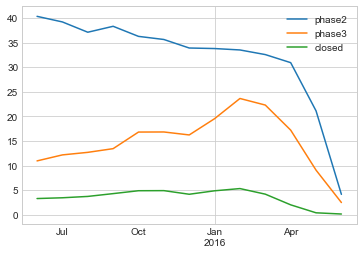

In [162]:
avg_closing_times.plot()

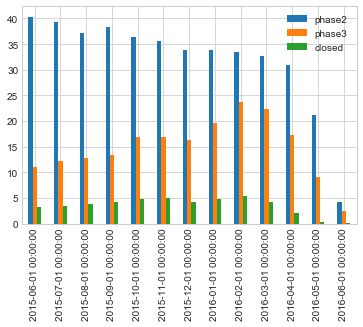

In [163]:
avg_closing_times.plot(kind="bar")